   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

<Figure size 800x600 with 0 Axes>

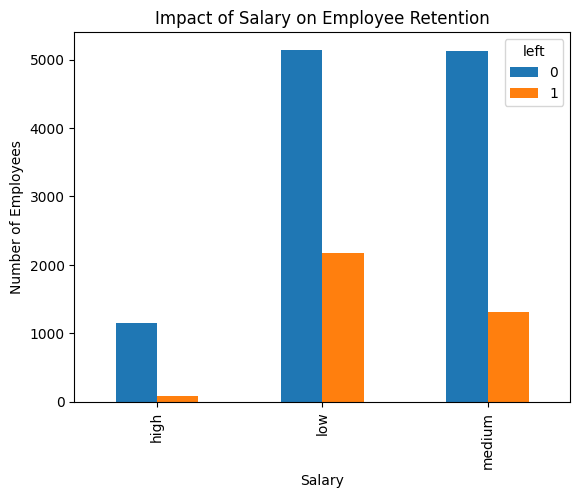

<Figure size 1000x600 with 0 Axes>

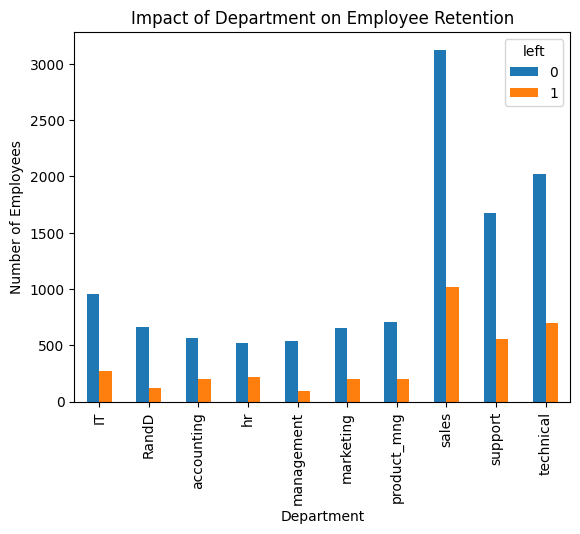

Accuracy of the Logistic Regression model: 0.762


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
# prompt: To Do: Implementation – Logistic Regression
# (Binary Classification)
# Write Python code to implement the following. Consider dataset file as “HR_comma_sep.csv”
# Do some exploratory data analysis to figure out which variables have direct and clear
# impact on employee retention (i.e. whether they leave the company or continue to work)
# Plot bar charts showing impact of employee salaries on retention
# Plot bar charts showing corelation between department and employee retention
# Build logistic regression model using variables that were narrowed down in step 1
# Measure the accuracy of the model

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
try:
  df = pd.read_csv('HR_comma_sep.csv')
except FileNotFoundError:
  print("Error: 'HR_comma_sep.csv' not found. Please upload the file.")
  exit()


# Exploratory Data Analysis
# ... (Perform EDA to identify relevant features.  Example below)
print(df.head()) #shows first 5 rows
print(df.describe()) #summary statistics of the numerical data

# Analyze salary impact on retention
plt.figure(figsize=(8,6))
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

# Analyze department impact on retention
plt.figure(figsize=(10,6))
pd.crosstab(df.Department, df.left).plot(kind="bar")
plt.title('Impact of Department on Employee Retention')
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()

# Feature Selection (Based on EDA, select relevant features)
# Example:  salary, satisfaction_level, average_montly_hours, promotion_last_5years
features = ['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']
X = pd.get_dummies(df[features], drop_first=True) # One-hot encode categorical variables
y = df['left']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21



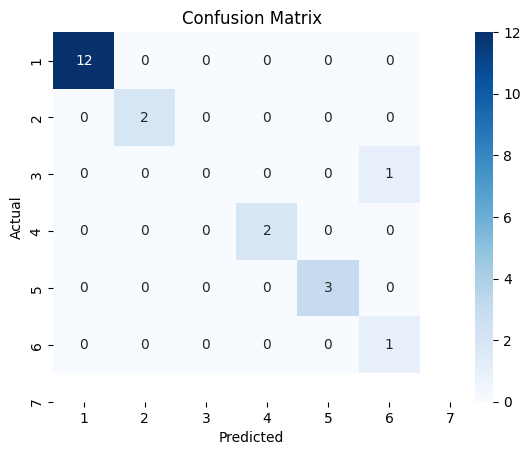

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the datasets
# If the file is not in /mnt/data/, update the path below to the correct path
zoo_data = pd.read_csv('zoo-data.csv')
zoo_class = pd.read_csv('zoo-class-type.csv') # Update if zoo-class-type.csv is in a different directory

# Merge the datasets on class_type if necessary
if 'class_type' in zoo_data.columns and 'class_type' in zoo_class.columns:
    merged_data = zoo_data.merge(zoo_class, on='class_type', how='left')
else:
    merged_data = zoo_data  # Assuming class_type is already labeled

# Separate features and target variable
X = merged_data.drop(columns=['class_type', 'animal_name'], errors='ignore')  # Drop non-numeric columns
y = merged_data['class_type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()